Nos données proviennent de cet dataset (heart.csv). Il contient 303 dossiers de patients. Chaque dossier contient 14 attributs :

|   Label  |                                    Description                                    |
|:--------:|:---------------------------------------------------------------------------------:|
| Age      | Age in year                                                                       |
| sex      | (1 = male; 0 = female)                                                            |
| cp       | chest pain type                                                                   |
| trestbps | resting blood pressure (in mm Hg on admission to the hospital)                    |
| chol     | serum cholestoral in mg/dl                                                        |
| fbs      | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)                           |
| restecg  | resting electrocardiographic results                                              |
| thalach  | maximum heart rate achieved                                                       |
| exang    | exercise induced angina (1 = yes; 0 = no)                                         |
| oldpeak  | ST depression induced by exercise relative to rest                                |
| slope    | the slope of the peak exercise ST segment                                         |
| ca       | number of major vessels (0-3) colored by flourosopy                               |
| thal     | (3 = normal; 6 = fixed defect; 7 = reversable defect)                             |
| target   | (0 = no heart disease; 1 = heart disease presence)                                |

### Libraries

In [36]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import seaborn as sns

import tensorflow as tf


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
from pylab import rcParams


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import rc

from sklearn.model_selection import train_test_split


%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

### Loading the Data


In [38]:
data = pd.read_csv('data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
data.shape

(303, 14)

In [41]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [42]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Répartition des données par sexe

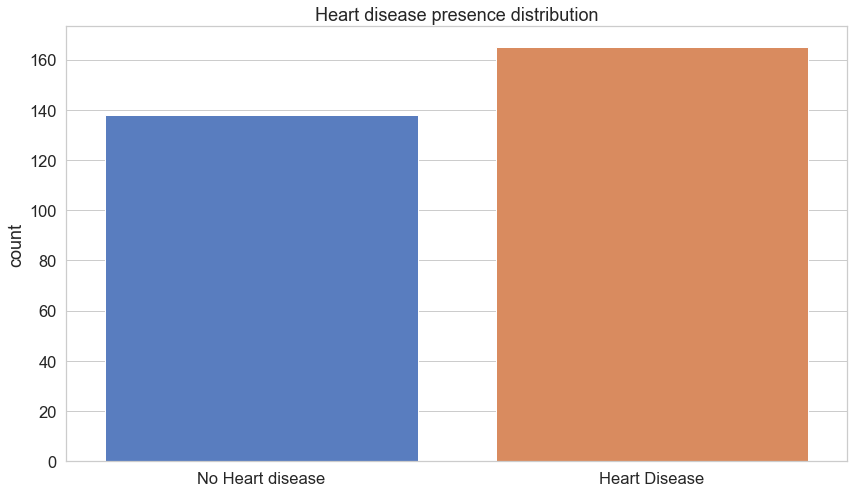

In [43]:
f = sns.countplot(x='target', data=data)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

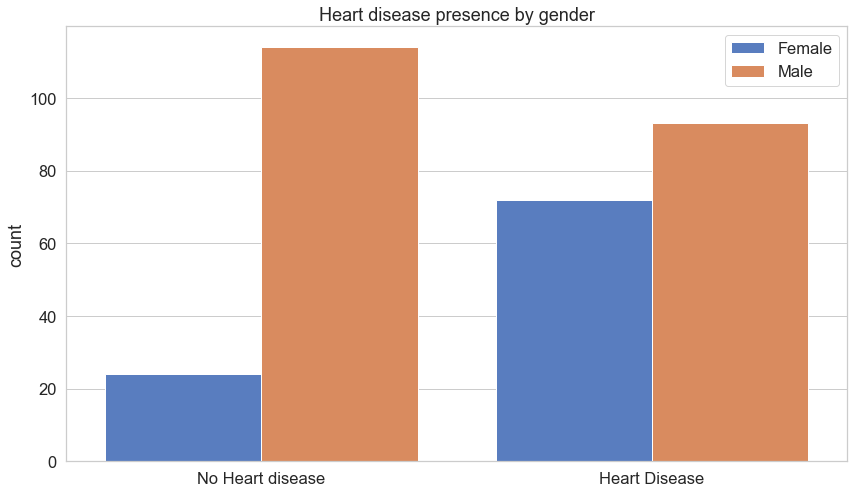

In [44]:
f = sns.countplot(x='target', data=data, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

Pearson correlation heatmap entre les caractéristiques:

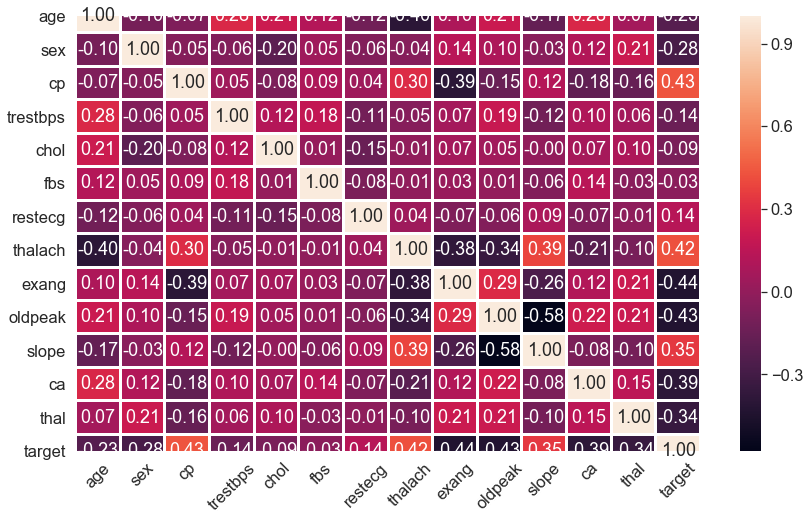

In [45]:
heat_map = sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);

la relation entre les maladies cardiaques, l'âge et la fréquence cardiaque maximale : 

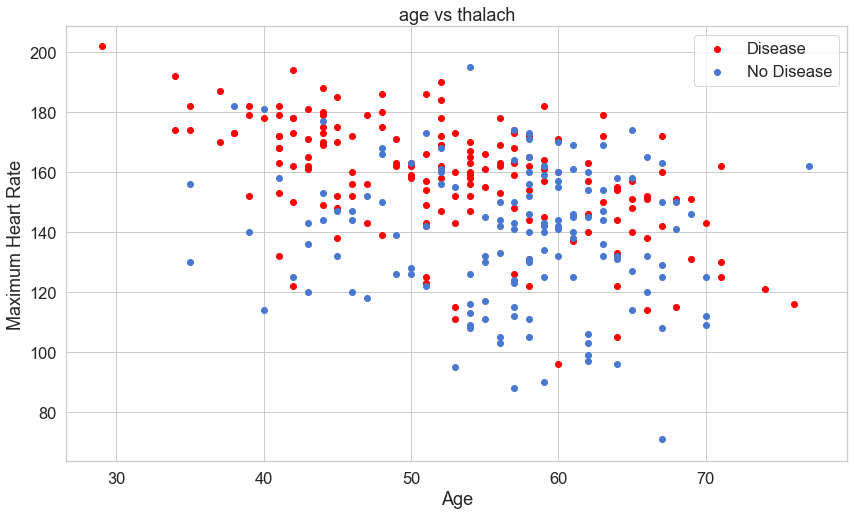

In [46]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "No Disease"])
plt.title('age vs thalach')       
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate");

Selon ce chiffre, il semble bien qu'il y a une corrélation entre la fréquence cardiaque maximale et l'âge. Il semble que plus la fréquence cardiaque maximale est élevée, plus le patient risque d'avoir une maladie cardiaque. Il semble également qu'il y ait de nombreuses valeurs aberrantes à un rythme cardiaque maximum très élevé et à l'âge qui ne sont pas des maladies cardiaques, ce qui pourrait entraîner des faux positifs plus tard.

Une relation linéaire simple entre age et la fréquence cardiaque maximale (thalach)

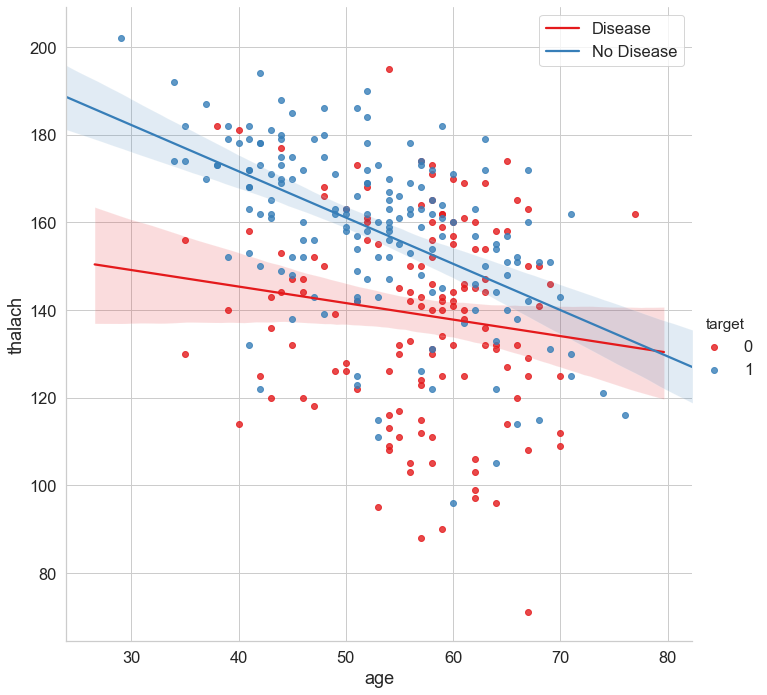

In [47]:
sns.lmplot(y='thalach',x='age', hue="target", data=data, palette="Set1", height=10)
plt.legend(['Disease', 'No Disease']);

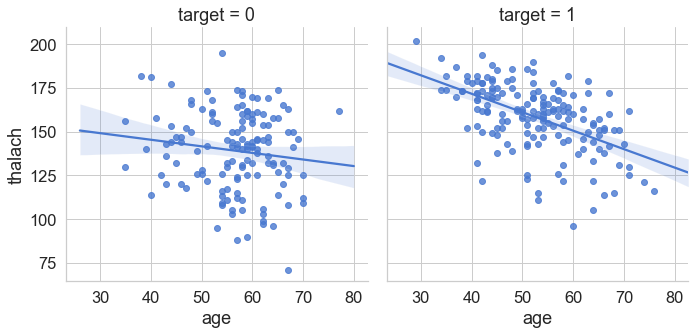

In [48]:
sns.lmplot(y='thalach',x='age', col="target", data=data, palette="Set1")


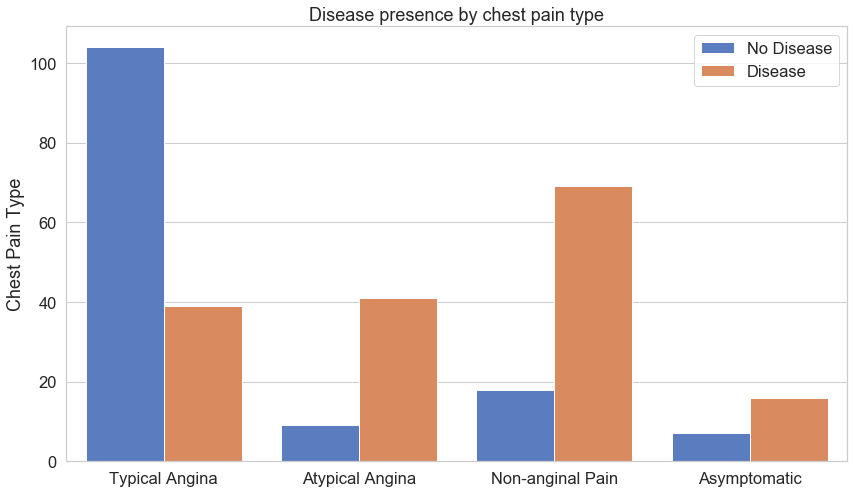

In [50]:
f = sns.countplot(x='cp', data=data, hue='target')
f.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']);
f.set_title('Disease presence by chest pain type')
plt.ylabel('Chest Pain Type')
plt.xlabel('')
plt.legend(['No Disease', 'Disease']);

On remarque que le fait d'avoir des douleurs thoraciques n'est peut-être pas un signe de maladie cardiaque.

### Data Preprocessing

In [51]:
feature_columns = []

# numeric cols
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']:
  feature_columns.append(tf.feature_column.numeric_column(header))

# bucketized cols
age = tf.feature_column.numeric_column("age")
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

# indicator cols
data["thal"] = data["thal"].apply(str)
thal = tf.feature_column.categorical_column_with_vocabulary_list(
      'thal', ['3', '6', '7'])
thal_one_hot = tf.feature_column.indicator_column(thal)
feature_columns.append(thal_one_hot)

data["sex"] = data["sex"].apply(str)
sex = tf.feature_column.categorical_column_with_vocabulary_list(
      'sex', ['0', '1'])
sex_one_hot = tf.feature_column.indicator_column(sex)
feature_columns.append(sex_one_hot)

data["cp"] = data["cp"].apply(str)
cp = tf.feature_column.categorical_column_with_vocabulary_list(
      'cp', ['0', '1', '2', '3'])
cp_one_hot = tf.feature_column.indicator_column(cp)
feature_columns.append(cp_one_hot)

data["slope"] = data["slope"].apply(str)
slope = tf.feature_column.categorical_column_with_vocabulary_list(
      'slope', ['0', '1', '2'])
slope_one_hot = tf.feature_column.indicator_column(slope)
feature_columns.append(slope_one_hot)


# embedding cols
thal_embedding = tf.feature_column.embedding_column(thal, dimension=8)
feature_columns.append(thal_embedding)

# crossed cols
age_thal_crossed = tf.feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
age_thal_crossed = tf.feature_column.indicator_column(age_thal_crossed)
feature_columns.append(age_thal_crossed)

cp_slope_crossed = tf.feature_column.crossed_column([cp, slope], hash_bucket_size=1000)
cp_slope_crossed = tf.feature_column.indicator_column(cp_slope_crossed)
feature_columns.append(cp_slope_crossed)

In [52]:
def create_dataset(dataframe, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  return tf.data.Dataset.from_tensor_slices((dict(dataframe), labels)) \
          .shuffle(buffer_size=len(dataframe)) \
          .batch(batch_size)

In [53]:
train, test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

In [54]:
train_ds = create_dataset(train)
test_ds = create_dataset(test)

In [55]:
model = tf.keras.models.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns=feature_columns),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

### Training

Notre fonction de loss est une entropie croisée binaire définie par :

$$ −(ylog(p)+(1−y)log(1−p))$$

avec $y$ est un indicateur binaire si la classe prédite est correcte pour l'observation actuelle et $p$ est la probabilité prédite.

In [56]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=100, use_multiprocessing=True)

Epoch 1/100
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
8/8 [==============================] - 1s 99ms/step - loss: 3.2570 - accuracy: 0.4770 - val_loss: 1.5069 - val_accuracy: 0.5246
Epoch 2/100
8/8 [==============================] - 0s 40ms/step - loss: 1.5267 - accuracy: 0.5024 - val_loss: 0.6970 - val_accuracy: 0.5902
Epoch 3/100
8/8 [==============================] - 0s 42ms/step - loss: 1.1702 - accuracy: 0.5232 - val_loss: 0.6100 - val_accuracy: 0.6393
Epoch 4/100
8/8 [==============================] - 0s 40ms/step - loss: 0.9118 - accuracy: 0.5353 - val_loss

Accuracy sur l'ensemble des tests :

In [57]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 32ms/step - loss: 0.3697 - accuracy: 0.8852


[0.36972521245479584, 0.8852459]

Accuracy d'environ 87 % sur l'ensemble des tests.

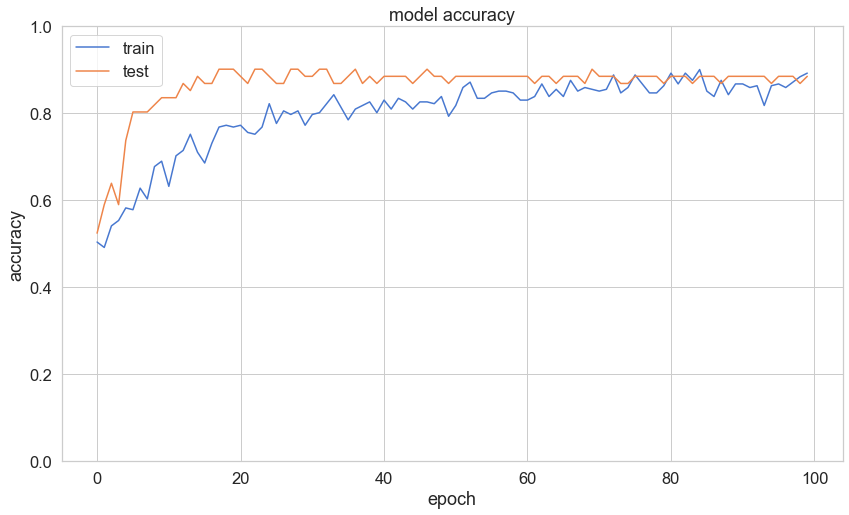

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='upper left');

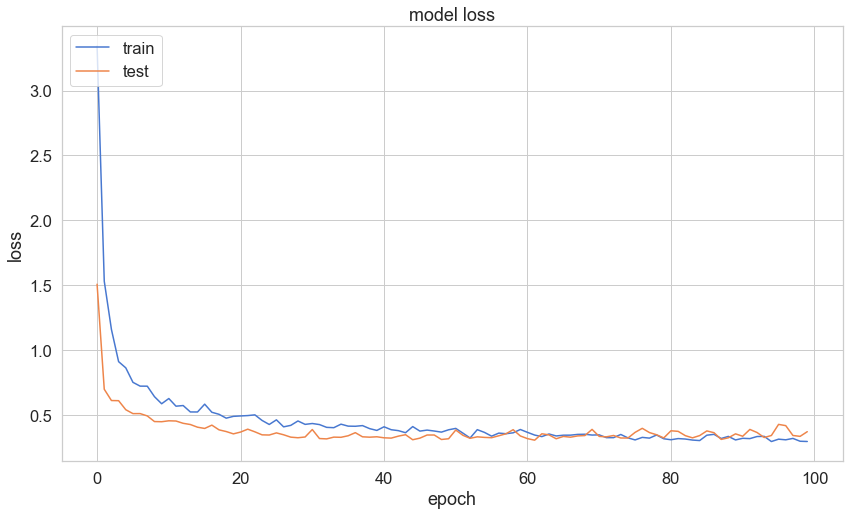

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [61]:
#cp
oneHotEncoder = OneHotEncoder(categorical_features=[2], n_values='auto')
oneHotEncoder.fit(X)
X = oneHotEncoder.transform(X).toarray()
X = X[:, 1:]
#restecg
oneHotEncoder = OneHotEncoder(categorical_features=[8], n_values='auto')
oneHotEncoder.fit(X)
X = oneHotEncoder.transform(X).toarray()
X = X[:, 1:]
#slope
oneHotEncoder = OneHotEncoder(categorical_features=[13], n_values='auto')
oneHotEncoder.fit(X)
X = oneHotEncoder.transform(X).toarray()
X = X[:, 1:]
#ca
oneHotEncoder = OneHotEncoder(categorical_features=[15], n_values='auto')
oneHotEncoder.fit(X)
X = oneHotEncoder.transform(X).toarray()
X = X[:, 1:]
#thal
oneHotEncoder = OneHotEncoder(categorical_features=[19], n_values='auto')
oneHotEncoder.fit(X)
X = oneHotEncoder.transform(X).toarray()
X = X[:, 1:]

C:\Users\SBHX-PC\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\SBHX-PC\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\SBHX-PC\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling

In [62]:
scalerX = StandardScaler()
X = scalerX.fit_transform(X)

In [63]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=0)

In [64]:
classifier = LogisticRegression()
classifier.fit(XTrain,yTrain)
yPred = classifier.predict(XTest)
mse = mean_squared_error(yTest,yPred)
r = r2_score(yTest,yPred)
mae = mean_absolute_error(yTest,yPred)
accuracy = accuracy_score(yTest,yPred)
print("Logistic Regression :")
print("Accuracy="  , accuracy)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Logistic Regression :
Accuracy= 0.8461538461538461
Mean Squared Error: 0.15384615384615385
R score: 0.38394584139265
Mean Absolute Error: 0.15384615384615385


C:\Users\SBHX-PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(XTrain,yTrain)
yPred = classifier.predict(XTest)
mse = mean_squared_error(yTest,yPred)
r = r2_score(yTest,yPred)
mae = mean_absolute_error(yTest,yPred)
accuracy = accuracy_score(yTest,yPred)
print("Decision Tree Classifier :")
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
print("Accuracy = ", accuracy)

Decision Tree Classifier :
Mean Squared Error: 0.31868131868131866
R score: -0.2761121856866535
Mean Absolute Error: 0.31868131868131866
Accuracy =  0.6813186813186813


In [66]:
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(XTrain,yTrain)
yPred = classifier.predict(XTest)
mse = mean_squared_error(yTest,yPred)
r = r2_score(yTest,yPred)
mae = mean_absolute_error(yTest,yPred)
accuracy = accuracy_score(yTest,yPred)
print("Support Vector Machine :")
print("Accuracy = ", accuracy)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Support Vector Machine :
Accuracy =  0.8571428571428571
Mean Squared Error: 0.14285714285714285
R score: 0.42794970986460357
Mean Absolute Error: 0.14285714285714285


### Références 

1 - https://www.kaggle.com/ronitf/heart-disease-uci

2- https://www.kaggle.com/digvijayyadav/beginners-guide-to-simple-machine-learning

3- https://www.curiousily.com/posts/heart-disease-prediction-in-tensorflow-2/

4- https://towardsdatascience.com/heart-disease-prediction-73468d630cfc

5- https://medium.com/@am7799/machine-learning-on-heart-disease-dataset-8a930cefff1d